In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape
x_train[5].shape

(28, 28)

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [0]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

W0723 05:19:14.986377 139939017910144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 05:19:15.032080 139939017910144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 05:19:15.041770 139939017910144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 05:19:15.080262 139939017910144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               160100    
__________

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0723 05:19:19.539967 139939017910144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 05:19:19.568763 139939017910144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
result = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0781 - acc: 0.9778 - val_loss: 0.6907 - val_acc: 0.9078
Epoch 2/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.0602 - acc: 0.9822 - val_loss: 0.6536 - val_acc: 0.9121
Epoch 3/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0720 - acc: 0.9808 - val_loss: 0.6870 - val_acc: 0.9049
Epoch 4/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0896 - acc: 0.9767 - val_loss: 0.6832 - val_acc: 0.9069
Epoch 5/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.0787 - acc: 0.9791 - val_loss: 0.6783 - val_acc: 0.9036
Epoch 6/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0767 - acc: 0.9788 - val_loss: 0.6762 - val_acc: 0.9060
Epoch 7/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0767 - acc: 0.9793 - val_loss: 0.7832 

In [19]:
result.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [21]:
result.history

{'acc': [0.9777666666666667,
  0.9822333333333333,
  0.98075,
  0.9766666666666667,
  0.9790666666666666,
  0.97885,
  0.9792666666666666,
  0.9803833333333334,
  0.9810833333333333,
  0.9783],
 'loss': [0.0780734322566868,
  0.06023658782584313,
  0.07200073222354819,
  0.08959755224849747,
  0.0787092919970278,
  0.07669273446122586,
  0.07671908180387685,
  0.07549513946664702,
  0.07510520366935583,
  0.09087402079752638],
 'val_acc': [0.9078,
  0.9121,
  0.9049,
  0.9069,
  0.9036,
  0.906,
  0.8978,
  0.9038,
  0.9072,
  0.9006],
 'val_loss': [0.6906623154195025,
  0.6535958285307278,
  0.6870251927453326,
  0.6831611456323415,
  0.6782963893579319,
  0.6761531135053316,
  0.7832245313814609,
  0.7512251671459526,
  0.7652468440402299,
  0.7287937600854318]}

Text(0.5, 0, 'Epochs')

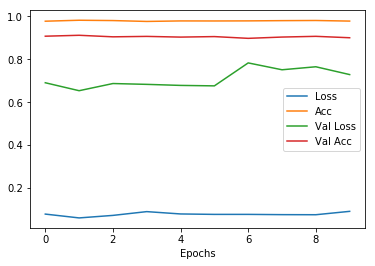

In [27]:
plt.plot(result.epoch, result.history['loss'], result.epoch, result.history['acc'], result.epoch, result.history['val_loss'], result.epoch, result.history['val_acc'])
plt.legend(['Loss', 'Acc', 'Val Loss', 'Val Acc'])
plt.xlabel('Epochs')